In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import glob

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# I'm loading the graphs train csv and validation csv provided for the Making Graphs Accessible Classification on kaggle to further challenge my understanding of the material

In [4]:
import pathlib
import os, json
import pandas as pd

In [3]:
#dataset_url = "C:/Users/Hg/Making Graphs Accessible/benetech-making-graphs-accessible.zip"
#data_dir = tf.keras.utils.get_file('benetech-making-graphs-accessible', origin=dataset_url, untar=True)
data_dir = pathlib.WindowsPath("C:/Users/Hg/Making Graphs Accessible/train/")
print(data_dir)

C:\Users\Hg\Making Graphs Accessible\train


In [4]:
image_count = len(list(data_dir.glob('**/*.jpg')))
print(image_count)

60578


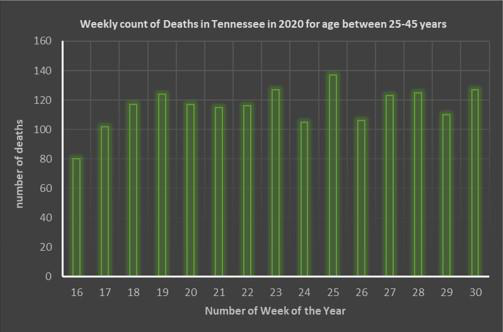

In [5]:
roses = list(data_dir.glob('images/*'))
PIL.Image.open(str(roses[4323]))

In [6]:
#this will sort out the annotations into a consolidated pandas dataframe
#this will allow us to organize the images into 

path_to_json = './train/annotations'

json_pattern = os.path.join(path_to_json, '*.json')
file_list = glob.glob(json_pattern)

dfs = []
for file in file_list:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
    dfs.append(json_data)
df = pd.concat(dfs, sort=False) # or sort=True depending on your needs

df.head()

,source,chart-type,text,data-series,plot-bb.height,plot-bb.width,plot-bb.x0,plot-bb.y0,axes.x-axis.ticks,axes.x-axis.tick-type,axes.x-axis.values-type,axes.y-axis.ticks,axes.y-axis.tick-type,axes.y-axis.values-type
0,generated,vertical_bar,"[{'id': 0, 'polygon': {'x0': 53, 'x1': 412, 'x...","[{'x': 'Malawi', 'y': 837799.95244483}, {'x': ...",137,379,83,53,"[{'id': 10, 'tick_pt': {'x': 103, 'y': 190}}, ...",markers,categorical,"[{'id': 3, 'tick_pt': {'x': 83, 'y': 53}}, {'i...",markers,numerical
0,generated,line,"[{'id': 0, 'polygon': {'x0': 210, 'x1': 446, '...","[{'x': 'Jan', 'y': 34.06176711672003}, {'x': '...",359,497,80,61,"[{'id': 12, 'tick_pt': {'x': 80, 'y': 421}}, {...",markers,categorical,"[{'id': 3, 'tick_pt': {'x': 80, 'y': 61}}, {'i...",markers,numerical
0,generated,line,"[{'id': 0, 'polygon': {'x0': 56, 'x1': 411, 'x...","[{'x': 'North Korea', 'y': 848122.6665414328},...",116,376,84,52,"[{'id': 10, 'tick_pt': {'x': 99, 'y': 168}}, {...",markers,categorical,"[{'id': 3, 'tick_pt': {'x': 84, 'y': 52}}, {'i...",markers,numerical
0,generated,scatter,"[{'id': 0, 'polygon': {'x0': 71, 'x1': 470, 'x...","[{'x': 1949.161409571262, 'y': 48.034807831762...",230,415,55,62,"[{'id': 8, 'tick_pt': {'x': 55, 'y': 292}}, {'...",markers,numerical,"[{'id': 1, 'tick_pt': {'x': 55, 'y': 62}}, {'i...",markers,numerical
0,generated,line,"[{'id': 0, 'polygon': {'x0': 184, 'x1': 635, '...","[{'x': 'Jan', 'y': 4.332117595048629}, {'x': '...",421,507,158,67,"[{'id': 8, 'tick_pt': {'x': 180, 'y': 488}}, {...",markers,categorical,"[{'id': 3, 'tick_pt': {'x': 158, 'y': 91}}, {'...",markers,numerical


In [ ]:
#time to mold some data for multiclass classification


In [7]:
#next we need to match the annotation dataframe elements with the appropriate image
#this can be done by matching the names of the json and jpg files
#we can then move the files to the appropriate directory
# import shutil
# # make a path_to_jpg
# path_to_jpg = './train/images'
# #make a list of jpg paths
# jpg_pattern = os.path.join(path_to_jpg, '*.jpg')
# jpg_list = glob.glob(json_pattern)
# #we'll take the path_to_json to procure a comparison
# for jpg in jpg_list:
#     for file in file_list:
#         with open(jpg) as j:
#             with open(file) as f:
#                 if(j.name == f.name):
# #then we should be able to put the file in the appropriate folder based on the json file name
#                     json_data = json.loads(f.read())
#                     match json_data:
#                         case 'vertical_bar':
#                             shutil.move(jpg, 'C:/Users/Hg/Making Graphs Accessible/train/vertical_bar')
#                         case 'horizontal_bar':
#                             shutil.move(jpg, 'C:/Users/Hg/Making Graphs Accessible/train/horizontal_bar')
#                         case 'line':
#                             shutil.move(jpg, 'C:/Users/Hg/Making Graphs Accessible/train/line')
#                         case 'scatter':
#                             shutil.move(jpg, 'C:/Users/Hg/Making Graphs Accessible/train/scatter')
#                         case 'dot':
#                             shutil.move(jpg, 'C:/Users/Hg/Making Graphs Accessible/train/dot')
                            




